<a href="https://colab.research.google.com/github/Bio-MingChen/DL_practice_by_Colab/blob/main/pytroch_test_20250805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

对于卷积层 `Conv2D`，输出图像的大小可以通过下面这个公式计算：

---

### ✅ 输出尺寸计算公式（不考虑 dilation）：

设输入图像大小为：

* 高度 \$H\_{in}\$
* 宽度 \$W\_{in}\$

卷积核参数为：

* 核大小：\$K\$（例如 \$K = 3\$ 表示 \$3 \times 3\$）
* 步长：\$S\$
* 填充：\$P\$

则输出图像的尺寸为：

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - K}{S} \right\rfloor + 1
$$

$$
W_{out} = \left\lfloor \frac{W_{in} + 2P - K}{S} \right\rfloor + 1
$$

---

### 📌 举个例子：

#### 输入：

* 输入图像大小：\$5 \times 5\$
* 卷积核：\$3 \times 3\$
* 步长 \$S = 1\$
* 填充 \$P = 0\$

则输出为：

$$
H_{out} = \left\lfloor \frac{5 + 0 - 3}{1} \right\rfloor + 1 = 3
$$

$$
W_{out} = 3
$$

输出图像大小：\$3 \times 3\$

---

### 🧠 常见设置：

| 模式        | Padding                                            | 输出大小变化              |
| --------- | -------------------------------------------------- | ------------------- |
| `'valid'` | \$P = 0\$                                          | 输出小于输入              |
| `'same'`  | \$P = \left\lfloor \frac{K - 1}{2} \right\rfloor\$ | 输出尺寸等于输入（当 \$S=1\$） |

---

### 🛠 实战 Tips：

1. **要保持输入输出大小一致**，通常设置：

   * `padding = 'same'`
   * `stride = 1`

2. **减小特征图尺寸**，可以用：

   * 较大的卷积核
   * 更大的 stride（如 \$S=2\$）
   * 不加 padding

3. **PyTorch 和 TensorFlow 都提供自动计算 padding 的方式（如 `padding='same'`）**

---

如你希望我写一段 PyTorch 或 TensorFlow 的代码来验证这个计算，我也可以提供。是否需要？


In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [8]:
BATCH_SIZE=64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
training_data = MNIST(root="data",train=True,download=True,transform=transform)
test_data = MNIST(root="data",train=False,download=True,transform=transform)
train_dataloader = DataLoader(training_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]


非常好的问题！你给出的这段代码是用于 **图像预处理** 的，常用于 PyTorch 中对数据集（比如 MNIST）的标准化处理。我们逐步讲解：

---

## 🔹 代码拆解讲解

```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
```

### ✅ 1. `transforms.ToTensor()`

* 作用：将 **PIL 图像 或 NumPy 数组** 转换为 PyTorch 的 `torch.FloatTensor`，并且会将像素值从 `[0, 255]` 缩放到 `[0.0, 1.0]`。

---

### ✅ 2. `transforms.Normalize((0.1307,), (0.3081,))`

* **Normalize 是标准化操作**，作用是对每个通道进行如下变换：

$$
x_{norm} = \frac{x - \mu}{\sigma}
$$

* `(0.1307,)` 是 MNIST 数据集中像素值的均值（mean）
* `(0.3081,)` 是标准差（std）

因此，它将每个像素从 `[0, 1]` 变换到一个 **标准正态分布** 范围，大约在 `[-1, 1]` 之间，效果更好地帮助模型收敛。

---

## 🧠 为什么要 Normalize？

* 统一输入分布：防止某些特征值过大或过小，造成训练不稳定；
* 帮助梯度下降收敛更快；
* 提升模型性能。

---

## 🔸 如果不是图像，而是一维数据，如何 Normalize？

举个例子：你有一个一维张量，例如一个包含若干数值的 `1D array`，你可以直接使用：

```python
# 举例：x 是 torch.Tensor，例如 [2.0, 3.0, 5.0, 6.0]
mean = x.mean()
std = x.std()
x_normalized = (x - mean) / std
```

也可以封装成自定义的 `transform` 函数：

```python
class Normalize1D(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def __call__(self, x):
        return (x - self.mean) / self.std
```

然后像这样组合：

```python
transform = transforms.Compose([
    YourToTensorFunction(),  # 如果是CSV数据，需要自定义转换成Tensor
    Normalize1D(mean, std)
])
```

---

## ✅ 总结：是否使用 Normalize？

| 情况     | 是否需要 Normalize | 推荐方法                        |
| ------ | -------------- | --------------------------- |
| 图像     | 是              | 使用 `transforms.Normalize()` |
| 一维数值数据 | 是              | 自行计算 `mean` / `std` 后标准化    |
| 已标准化数据 | 否              | 无需再次 Normalize              |

---

如你提供一维数据的示例格式，我可以帮你写出完整的标准化 pipeline。是否要？

这是个很好的问题！像 `(0.1307,), (0.3081,)` 这样用 **元组（tuple）包起来**，是为了处理 **多通道数据（如图像）时每个通道都有不同的均值和标准差**。我们具体来解释为什么这样写，即使对 MNIST 这样的单通道数据也要这么写。

---

## ✅ 原因：`transforms.Normalize(mean, std)` 的参数格式要求

* `mean`: 每个通道的均值组成的**元组**
* `std`: 每个通道的标准差组成的**元组**

### 🎯 举个例子：

#### 1. **MNIST 是灰度图像**（1 个通道）：

```python
transforms.Normalize((0.1307,), (0.3081,))
```

这里 `(0.1307,)` 表示第一个通道（唯一一个通道）的均值是 `0.1307`。

---

#### 2. **CIFAR-10 是 RGB 彩色图像**（3 个通道）：

```python
transforms.Normalize((0.4914, 0.4822, 0.4465),
                     (0.2023, 0.1994, 0.2010))
```

每个通道（R、G、B）都有自己的均值和标准差。

---

## ❗ 如果不包成 tuple，会怎样？

```python
transforms.Normalize(0.1307, 0.3081)
```

会报错，或者被错误理解成 **多个通道共享的标量**，但 PyTorch 的 `transforms.Normalize` 明确要求传入 **tuple 或 list**，即使只有一个通道也要这样写：

```python
mean = (0.1307,)
std = (0.3081,)
```

---

## ✅ 总结

| 写法                                           | 是否正确 | 说明         |
| -------------------------------------------- | ---- | ---------- |
| `transforms.Normalize((0.1307,), (0.3081,))` | ✅ 正确 | 单通道图像，标准写法 |
| `transforms.Normalize([0.1307], [0.3081])`   | ✅ 正确 | 也可以用 list  |
| `transforms.Normalize(0.1307, 0.3081)`       | ❌ 错误 | 会报错或行为不明   |

---

如果你用的是自定义一维数据（非图像），就不需要这样包 tuple，可以直接写 `mean` 和 `std`。是否需要我给你一个一维数据的标准化完整例子？



### ✅ 输出尺寸计算公式（不考虑 dilation）：

设输入图像大小为：

* 高度 \$H\_{in}\$
* 宽度 \$W\_{in}\$

卷积核参数为：

* 核大小：\$K\$（例如 \$K = 3\$ 表示 \$3 \times 3\$）
* 步长：\$S\$
* 填充：\$P\$

则输出图像的尺寸为：

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - K}{S} \right\rfloor + 1
$$

$$
W_{out} = \left\lfloor \frac{W_{in} + 2P - K}{S} \right\rfloor + 1
$$

In [13]:
def conv2d_output_size(H_in,W_in,kernel_size,stride=1,padding=0,dilation=1):
  """
    计算 Conv2D 输出图像的尺寸

    参数：
        H_in, W_in: 输入图像的高和宽
        kernel_size: 卷积核大小（int 或 tuple）
        stride: 步长（int 或 tuple）
        padding: 填充（int 或 tuple）
        dilation: 膨胀（默认为 1）

    返回：
        H_out, W_out: 输出图像的高和宽
    """
  if isinstance(kernel_size, int):
    kernel_size = (kernel_size, kernel_size)
  if isinstance(stride, int):
    stride = (stride, stride)
  if isinstance(padding, int):
    padding = (padding, padding)
  if isinstance(dilation, int):
    dilation = (dilation, dilation)

  H_out = ((H_in + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0]) + 1
  W_out = ((W_in + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1]) + 1
  return H_out, W_out

def pool2d_output_size(H_in, W_in, kernel_size, stride=None, padding=0):
  """
  计算池化层（MaxPool2D）输出图像尺寸

  参数：
      H_in, W_in: 输入图像的高和宽
      kernel_size: 池化核大小（int 或 tuple）
      stride: 步长（int 或 tuple，默认等于 kernel_size）
      padding: 填充（int 或 tuple）

  返回：
      H_out, W_out: 输出图像的高和宽
  """
  if stride is None:
    stride = kernel_size
  if isinstance(kernel_size, int):
    kernel_size = (kernel_size, kernel_size)
  if isinstance(stride, int):
    stride = (stride, stride)
  if isinstance(padding, int):
    padding = (padding, padding)

  H_out = ((H_in + 2 * padding[0] - kernel_size[0]) // stride[0]) + 1
  W_out = ((W_in + 2 * padding[1] - kernel_size[1]) // stride[1]) + 1
  return H_out, W_out


In [18]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,3,1,1)
    self.conv2 = nn.Conv2d(16,32,3,1,1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.pool2d = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(32 * self._get_output_size(),128)
    self.fc2 = nn.Linear(128,10)
    self.flatten = nn.Flatten()
    self.bn1 = nn.BatchNorm2d(16)
    self.bn2 = nn.BatchNorm2d(32)


  def _get_output_size(self):
    H, W = 28 , 28
    H, W = conv2d_output_size(H, W, 3, 1, 1)
    H, W = conv2d_output_size(H, W, 3, 1, 1)
    H, W = pool2d_output_size(H, W, 2, 2)
    print(f"最终图片大小：{H} x {W}")

    return H * W

  def forward(self, x):
    x = self.bn1(self.conv1(x))
    x = F.relu(x)
    x = self.bn2(self.conv2(x))
    x = F.relu(x)
    x = self.pool2d(x)
    x = self.dropout1(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = F.relu(x)
    x = self.fc2(x)
    output = F.log_softmax(x,dim=1)
    return output


好问题！`dilation`（膨胀）在卷积操作中是一个不太容易直观理解但很有用的参数。它主要用于扩展卷积核的感受野（receptive field）**而不增加参数量**，常用于 **空洞卷积（dilated convolution / atrous convolution）**。

---

## 🔹 dilation 是什么？

它控制的是 **卷积核内部元素之间的间距**，默认是 `1`，表示卷积核的元素是连续的。

例如对于一个 3×3 的卷积核：

### 如果 `dilation = 1`（默认）：

```
X X X
X X X
X X X
```

### 如果 `dilation = 2`：

```
X . X . X
. . . . .
X . X . X
. . . . .
X . X . X
```

> “`.`” 代表被跳过的位置。相当于卷积核是 3×3，但感受野扩展为 5×5。

---

## ✅ 作用：**扩大感受野，不增加参数量**

普通卷积：

* 卷积核大小：\$k\$
* 感受野：\$k\$

空洞卷积：

* 卷积核大小：\$k\$
* 感受野：\$k + (k-1) \times (dilation-1)\$

例如：

| Kernel Size | Dilation | Effective Receptive Field |
| ----------- | -------- | ------------------------- |
| 3           | 1        | 3                         |
| 3           | 2        | 5                         |
| 3           | 3        | 7                         |

---

## 🧠 什么时候用 dilation？

* **语义分割 / 密集预测任务**：如 DeepLab 系列，用 dilation 让网络同时看到局部与全局信息；
* **时间序列 / 一维卷积**：能建模长距离依赖；
* **想扩大感受野但不想池化**：dilation 是替代 downsampling 的一种方式。

---

## 📐 和 padding/stride 的关系？

它会影响卷积输出大小的计算，之前的公式：

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - D \cdot (K - 1) - 1}{S} \right\rfloor + 1
$$

其中：

* \$D\$ = dilation
* \$K\$ = kernel size

所以 dilation 会让你输出变得更小，除非 padding 也做相应增加。

---

## ✅ 总结

| 参数            | 控制内容              |
| ------------- | ----------------- |
| `kernel_size` | 卷积核的大小（覆盖范围）      |
| `stride`      | 每次卷积滑动的步长         |
| `padding`     | 是否对边缘补零，影响输出大小    |
| `dilation`    | 控制卷积核内部元素的间距（感受野） |

---

需要我画一张图或者写个 PyTorch 例子帮你直观理解吗？


你写得非常好，整体架构清晰、思路正确，而且 `_get_output_size()` 的动态计算方式是非常推荐的 ✅。不过你这段代码里有几个小问题 / bug，会导致运行错误或逻辑不一致。我来帮你一一指出并修改。

---

## ✅ **逐点检查你的代码：**

---

### ❌ 1. `_get_output_size()` 中 `H, W = 28 * 28` 是错误的！

你写的是：

```python
H, W = 28 * 28
```

这是在把 `28 * 28 = 784` 赋值给一个元组，会报错 `cannot unpack int object`。

✅ 应该改成：

```python
H, W = 28, 28
```

---

### ❌ 2. `_get_output_size()` 中变量写错了：`H, w = pool2d_output_size(H, w, 2, 2)`

你写了 `H, w`（小写 w），但是传进去的是 `H, w`，此时 `w` 根本不存在，会报错。

✅ 改为：

```python
H, W = pool2d_output_size(H, W, 2, 2)
```

---

### ❌ 3. `forward(x)` 缺少 `self` 参数

你写了：

```python
def forward(x):
```

这是普通函数的写法。类方法必须写 `self`，否则会报错。

✅ 改成：

```python
def forward(self, x):
```

---

### ❌ 4. `F.batch_norm(x)` 用法错误

你用了：

```python
x = F.batch_norm(x)
```

这是错误的用法。`F.batch_norm()` 需要你手动传入 running mean / var 等信息，通常不这样用。

✅ 正确做法：

* 使用 `nn.BatchNorm2d`：

```python
self.bn1 = nn.BatchNorm2d(16)
self.bn2 = nn.BatchNorm2d(32)
```

* 然后在 forward 里：

```python
x = self.bn1(self.conv1(x))
x = F.relu(x)
x = self.bn2(self.conv2(x))
x = F.relu(x)
```

---

## ✅ 修正后的完整版本：

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.pool2d = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * self._get_output_size(), 128)
        self.fc2 = nn.Linear(128, 10)

    def _get_output_size(self):
        H, W = 28, 28
        H, W = conv2d_output_size(H, W, 3, 1, 1)
        H, W = conv2d_output_size(H, W, 3, 1, 1)
        H, W = pool2d_output_size(H, W, 2, 2)
        print(f"最终图片大小：{H} x {W}")
        return H * W

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2d(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
```

---

## ✅ 现在你可以放心使用这个网络了！

建议你可以配合 `torchsummary` 打印模型结构看看：

```bash
pip install torchsummary
```

```python
from torchsummary import summary
model = Net()
summary(model, input_size=(1, 28, 28))
```

---

如你还想让 `_get_output_size()` 支持任意输入大小，也可以帮你扩展。是否需要？


In [15]:
!pip install torchsummary

In [20]:
from torchsummary import summary
model = Net()
model.to(device)  # Move the model to the device
summary(model, input_size=(1, 28, 28))

最终图片大小：14 x 14
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
            Conv2d-3           [-1, 32, 28, 28]           4,640
       BatchNorm2d-4           [-1, 32, 28, 28]              64
         MaxPool2d-5           [-1, 32, 14, 14]               0
           Dropout-6           [-1, 32, 14, 14]               0
           Flatten-7                 [-1, 6272]               0
            Linear-8                  [-1, 128]         802,944
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 809,130
Trainable params: 809,130
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.72
Params size (MB): 3

非常好的问题！

---

## ✅ `self.pool2d = nn.MaxPool2d(2)` 中的 `2` 是什么？

这其实是：

```python
nn.MaxPool2d(kernel_size=2)
```

而 **当你只写一个参数时**，PyTorch 会默认：

```python
stride = kernel_size
```

---

## ✅ 所以它等价于：

```python
nn.MaxPool2d(kernel_size=2, stride=2)
```

也就是说，这会对每个 `2×2` 的小区域做最大值提取，并**步长为 2 地滑动窗口**，从而达到 **将高宽都缩小一半** 的效果。

---

## 📐 举个例子：

假设你的输入是 \$32 × 28 × 28\$ 的特征图：

* 使用 `MaxPool2d(2)` 之后变为：

  $$
  32 × 14 × 14
  $$

---

## ✅ 默认参数回顾

```python
nn.MaxPool2d(
    kernel_size,
    stride=None,        # 默认为 kernel_size
    padding=0,
    dilation=1,
    return_indices=False,
    ceil_mode=False
)
```

---

## 🔎 如果你想做“滑动式”池化（不缩小尺寸），可以设置：

```python
nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
```

这样会保留更多细节，但输出尺寸会大于原图（除非 padding 合理调）。

---

## ✅ 总结

| 你写的代码              | 实际含义                                 |
| ------------------ | ------------------------------------ |
| `MaxPool2d(2)`     | `kernel_size=2, stride=2`            |
| `MaxPool2d(3)`     | `kernel_size=3, stride=3`            |
| `MaxPool2d(2,1)`   | `kernel_size=2, stride=1`            |
| `MaxPool2d(2,1,1)` | `kernel_size=2, stride=1, padding=1` |

---

需要我帮你写个小图示来说明池化是怎么滑动的吗？


In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [22]:
def train(dataloader,model,optimizer):
  model.train()
  baches = len(dataloader)
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    optimizer.zero_grad()
    pred = model(X)
    loss = F.nll_loss(pred, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 99:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>4f}  [{current:>5d}/{size:>5d}]")

def test(dataloader,model):
  model.eval()
  size = len(dataloader.dataset)
  total_loss = 0
  correct = 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss = F.nll_loss(pred, y, reduction='sum')
      total_loss += loss.item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    print(f"avg loss: {total_loss / size:>4f}")
    print(f"accuracy: {correct / size:>4f}")

In [24]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t} \n =================")
  train(train_dataloader, model, optimizer)
  test(test_dataloader, model)

print("Done")

Epoch 0 
loss: 0.488987  [ 6336/60000]
loss: 0.470131  [12736/60000]
loss: 0.177094  [19136/60000]
loss: 0.224268  [25536/60000]
loss: 0.106215  [31936/60000]
loss: 0.088131  [38336/60000]
loss: 0.365131  [44736/60000]
loss: 0.210952  [51136/60000]
loss: 0.138963  [57536/60000]
avg loss: 0.066140
accuracy: 0.980300
Epoch 1 
loss: 0.190746  [ 6336/60000]
loss: 0.012389  [12736/60000]
loss: 0.090486  [19136/60000]
loss: 0.095125  [25536/60000]
loss: 0.107077  [31936/60000]
loss: 0.152044  [38336/60000]
loss: 0.039345  [44736/60000]
loss: 0.050965  [51136/60000]
loss: 0.049674  [57536/60000]
avg loss: 0.048189
accuracy: 0.983500
Epoch 2 
loss: 0.181300  [ 6336/60000]
loss: 0.058892  [12736/60000]
loss: 0.030791  [19136/60000]
loss: 0.041983  [25536/60000]
loss: 0.032761  [31936/60000]
loss: 0.277538  [38336/60000]
loss: 0.101309  [44736/60000]
loss: 0.130015  [51136/60000]
loss: 0.104357  [57536/60000]
avg loss: 0.041072
accuracy: 0.986400
Epoch 3 
loss: 0.019383  [ 6336/60000]
loss: 0.08

In [ ]:
# VAE demo code
# https://github.com/pytorch/examples/blob/main/vae/main.py

In [26]:
print(torch.accelerator.is_available())
torch.accelerator.current_accelerator()

True


device(type='cuda')

In [2]:
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,))
])
training_data = datasets.MNIST("data",train=True,download=True,transform=transform)
test_data = datasets.MNIST("data",train=False,download=True,transform=transform)

print(training_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [9]:
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cuda


In [12]:
class VAE(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 400)
    self.fc21 = nn.Linear(400, 20)
    self.fc22 = nn.Linear(400, 20)
    self.fc3 = nn.Linear(20, 400)
    self.fc4 = nn.Linear(400, 784)

  def encoder(self,x):
    h1 = F.relu(self.fc1(x))
    mean = self.fc21(h1)
    logvar = self.fc22(h1)
    return mean, logvar

  def reparameterize(self, mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

  def decoder(self,z):
    h3 = F.relu(self.fc3(z))
    return torch.sigmoid(self.fc4(h3))

  def forward(self, x):
    mu, logvar = self.encoder(x.view(-1, 28*28))
    z = self.reparameterize(mu, logvar)
    return self.decoder(z), mu, logvar

model = VAE().to(device)

你问得非常好，而且是触及 **VAE（Variational Autoencoder）核心设计** 的一个关键点。让我们系统性地解释这个问题：

---

## 🎯 问题回顾：

你看到这段代码：

```python
self.fc21 = nn.Linear(400, 20)  # 输出 mu 向量
self.fc22 = nn.Linear(400, 20)  # 输出 logvar 向量
```

你问：“均值和方差不应该是 1 个数（scalar）吗？为什么这里是输出 20 维？”

---

## ✅ 正确答案是：

> 这是一个\*\*多维隐空间（latent space）\*\*的 VAE，**均值和方差向量都是 20 维的**，而不是单个标量。

---

## 🧠 解释一下背景：

### 🧬 VAE 的设计目标：

VAE 希望将高维输入（比如 784 维的 MNIST 图像）**编码成一个较低维的潜在向量 `z`**，比如 20 维。我们假设这个潜在向量来自某个分布：

$$
z \sim \mathcal{N}(\mu, \sigma^2)
$$

但在实践中，我们不会只生成一个 `z` 分量，而是生成一个**长度为 `20` 的向量 `z = [z₁, z₂, ..., z₂₀]`**，每个分量都来自对应的正态分布。

---

## 🧩 所以你看到的：

```python
self.fc21 = nn.Linear(400, 20)  # 输出 20 维的 mu 向量
self.fc22 = nn.Linear(400, 20)  # 输出 20 维的 logvar 向量
```

就是将 400 维隐藏特征映射为：

* 一个长度为 20 的 **均值向量** `μ = [μ₁, ..., μ₂₀]`
* 一个长度为 20 的 **对数方差向量** `logσ² = [logσ₁², ..., logσ₂₀²]`

接着通过 reparameterization：

```python
z = mu + eps * std
```

采样得到一个完整的 20 维潜在变量 `z`。

---

## ✅ 为什么 latent vector 要多维？

* **更强的表达能力**：1 个维度只能编码极少信息；
* **可视化 / 聚类**：2D/3D/20D 的 z 更容易分析；
* **降维效果好**：输入是 784 维，压缩到 20 维就是典型的降维表示；
* **调控生成**：你可以调节某一维度，看 decoder 生成图像如何变化。

---

## 🧪 举个例子：

对于 MNIST 手写数字图像（28×28=784维），典型 VAE 参数如下：

```python
input_dim = 784
latent_dim = 20  # 可以是 2, 10, 32...自己定义
```

如果你想让 VAE 的 latent 是 scalar，也可以写：

```python
self.fc21 = nn.Linear(400, 1)
self.fc22 = nn.Linear(400, 1)
```

但通常这样做效果会非常差，因为它不能捕捉足够的信息。

---

## ✅ 总结一句话：

> 均值和方差不是 scalar，而是 **每个 latent 维度都有一个独立的分布**。因此输出是 **向量维度 = latent dim（例如 20）**，是 VAE 的核心设计。

---

是否需要我画个图帮你理解「μ、σ、z 的流动过程」？或者你想看 latent dim 改变后重建图像的效果对比？

你这个问题非常关键！在设计 VAE 时，**latent 维度（比如你看到的 20）** 是一个超参数，**不是固定的标准**，但确实有一些**常用经验值和设计原则**。

---

## ✅ 一句话回答：

> **20 是一个常用的经验值**，尤其在处理像 MNIST 这种中等复杂度的图像数据时，**既不会太小导致信息缺失，也不会太大导致学习困难或过拟合**。

---

## 🧠 Latent dim（潜在维度）的作用是什么？

在 VAE 中，latent vector `z` 是：

* **压缩表示**（信息瓶颈）
* **生成来源**（通过 decoder 重建图像）

它越小，表示压缩越厉害（信息越少）；
它越大，表示保留的信息越多（更容易重建，但可能会失去抽象能力）。

---

## 🔍 不同维度下的典型应用建议：

| 数据集 / 任务             | 常用 latent dim | 原因                   |
| -------------------- | ------------- | -------------------- |
| MNIST（28×28 灰度图）     | **2 \~ 20**   | 图像简单，小维度可视化好         |
| CIFAR-10（32×32 彩图）   | **32 \~ 128** | 图像更复杂，需要更多容量         |
| CelebA / face / 自然图像 | **64 \~ 256** | 高分辨率、纹理复杂            |
| 文本嵌入 / 表征学习          | **16 \~ 128** | 与语义表达能力相关            |
| 单细胞表达数据（稀疏）          | **8 \~ 64**   | 看降维效果，UMAP/t-SNE 可视化 |

---

## 📉 不合理维度带来的问题：

| latent dim 过小 | latent dim 过大            |
| ------------- | ------------------------ |
| 重建效果差         | 容易学成**identity mapping** |
| 潜在空间不连续       | KL loss 变小、学习不充分         |
| 丧失生成能力        | 无法控制结构                   |

---

## ✅ 如何选择合适的 latent dim？

1. **可视化**：尝试 2 或 3 维，做 t-SNE / UMAP 看聚类效果；
2. **重建误差**：dim 太小 → 重建误差大；
3. **KL loss 曲线**：观察 KL divergence 是否变得极小（表明 z 没有被使用）；
4. **生成图像质量**：dim 太小可能生成图像模糊、缺失细节；
5. **调优法**：尝试 \[2, 10, 20, 50, 100] 进行 grid search。

---

## 🧪 小实验建议（用 MNIST）：

```python
for dim in [2, 5, 10, 20, 50, 100]:
    model = VAE(latent_dim=dim)
    train(...)
    visualize_latent_space(model)
    compare_reconstruction(model)
```

---

## ✅ 总结

| 问题       | 回答                          |
| -------- | --------------------------- |
| 为什么是 20？ | 是 MNIST 常用经验值，压缩比合理、性能较好    |
| 能改吗？     | 可以！从 2 到 100 都可以试           |
| 选多少合适？   | 看你的任务复杂度、重建需求、生成质量而定        |
| 有指标评估吗？  | 有：重建误差、KL loss、latent 分布可视化 |

---

是否需要我给你一段可以动态设置 latent dim 的 VAE 代码框架？或者一个对比图展示不同 latent dim 的影响？


这个问题问得非常深刻！在 VAE 中我们为什么使用 `logvar`（对数方差，log(σ²)）而不是直接用标准差 `std` 或方差 `var`？这是因为：

---

## ✅ **一、数值稳定性更高**

计算过程中使用 `logvar` 比 `std` 更稳定，特别是：

```python
std = torch.exp(0.5 * logvar)
```

* 避免了直接对很小的 `std` 做 log（容易变成 `-inf`）；
* 对网络来说，预测 `logvar` 更容易收敛、梯度平滑；
* `logvar` 的取值可以是任意实数（`(-∞, +∞)`），而 `std` 只能是正数；
  → 这避免了强行让网络输出非负数的麻烦（比如 `ReLU(std)` 就不合适）。

---

## ✅ 二、Kullback-Leibler (KL) 散度的计算公式中自然出现了 logσ²

VAE 的 KL 散度项（正则化项）如下：

$$
\mathrm{KL}(\mathcal{N}(\mu, \sigma^2) \parallel \mathcal{N}(0,1)) =
- \frac{1}{2} \sum_{i=1}^{d} \left( 1 + \log(\sigma_i^2) - \mu_i^2 - \sigma_i^2 \right)
$$

> 注意里面有一项 `log(σ²)`，而不是 `σ` 或 `σ²`，这就是我们选择 **直接输出 `logvar`** 的原因。

### 💡 如果你预测 `std`，还得先平方再 log，反而麻烦又不稳定。

---

## ✅ 三、方便优化和梯度传播

* `logvar` 输出范围更自然，不需要额外的约束（如 softplus 或 abs）
* `logvar` 对应的梯度不会爆炸/消失那么严重（尤其是在反向传播 KL loss 时）

---

## 🧠 小结比较：

| 形式       | 优点           | 缺点            |
| -------- | ------------ | ------------- |
| `std`    | 直观（人类习惯）     | 不易优化，必须保证 > 0 |
| `var`    | 也行，但还是需要 ≥ 0 | 不方便用于 KL 或采样  |
| `logvar` | ✅ 更稳定，✅ 优化方便 | 不直观（但数学上更合理）  |

---

## ✅ 所以 VAE 中标准做法是：

* 网络输出 `μ` 和 `logvar`
* 用 `std = exp(0.5 * logvar)` 计算标准差
* 再通过 reparameterization：

  $$
  z = \mu + \epsilon \cdot \text{std}
  $$

---

如你需要我帮你手动推一遍 VAE 的 KL loss 推导（证明为什么自然出现 logvar），我可以详细列出来。是否需要？


非常好，这段函数是 **VAE（Variational Autoencoder）中最核心的一步**，叫做：

> **重参数化技巧（Reparameterization Trick）**

它是整个 VAE 能够 **端到端用反向传播训练的关键**。

---

## 📌 这段代码的作用总结：

```python
def reparameterize(self, mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std
```

这段代码的目的是：

> **从一个正态分布 \$\mathcal{N}(\mu, \sigma^2)\$ 中采样 `z`，但要让这个采样过程“可导”，从而允许神经网络通过反向传播学习 `mu` 和 `logvar`。**

---

## 🔍 每一行做了什么？

### ✅ 第 1 行：

```python
std = torch.exp(0.5 * logvar)
```

* 将网络输出的 `log(σ²)` 转换成 `σ`
* 为什么乘 0.5？因为：

  $$
  \log(\sigma^2) = 2 \log(\sigma) \Rightarrow \sigma = \exp(0.5 \cdot \logvar)
  $$

---

### ✅ 第 2 行：

```python
eps = torch.randn_like(std)
```

* 生成一个与 `std` 同形状的随机张量（正态分布 \$\mathcal{N}(0,1)\$）
* 这就是“随机性”的来源

---

### ✅ 第 3 行：

```python
return mu + eps * std
```

* 相当于采样自：

  $$
  z \sim \mathcal{N}(\mu, \sigma^2)
  \Rightarrow z = \mu + \sigma \cdot \epsilon,\quad \epsilon \sim \mathcal{N}(0,1)
  $$

这样我们就得到了 **符合期望分布的样本 `z`**，而且：

> ⚠️ 虽然我们用了随机数，但因为 `mu` 和 `std` 是“外乘”进去的，**整个过程对 `mu` 和 `logvar` 是可导的！**

---

## 🧠 为什么不能直接采样？

假设你直接写：

```python
z = torch.normal(mu, std)
```

* 那么采样过程不可导！
* 神经网络无法通过反向传播更新 `mu` 和 `logvar`！

这就违反了深度学习端到端训练的原则。

---

## 🧠 为什么叫 Reparameterization Trick？

我们把原来无法求导的采样：

$$
z \sim \mathcal{N}(\mu, \sigma^2)
$$

**重写为一个“可导的函数”：**

$$
z = \mu + \sigma \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, 1)
$$

这个重写过程就是所谓的：

> **重参数化（reparameterization）**

---

## ✅ 总结

| 步骤                        | 含义              |
| ------------------------- | --------------- |
| 输出 `mu`, `logvar`         | 网络预测每个样本对应的潜在分布 |
| `std = exp(0.5 * logvar)` | 计算标准差           |
| `eps = N(0,1)`            | 引入随机性           |
| `z = mu + eps * std`      | 从指定分布中采样，并可导    |

---

这个技巧首次在 2013 年 VAE 原始论文中提出，是 VAE 能被 gradient-based 方法训练的关键所在。

如果你想要我画图解释 μ、σ、z 的关系，也可以补上。是否需要？


你问得非常关键，这个问题触及到 **变分自编码器（VAE）背后的数学本质**。我们一步一步解释：

---

## ✅ 一、我们要解决什么问题？

VAE 的目标是：

> 让模型学会一个“编码器”，把输入 \$x\$ 映射为一个概率分布 \$\mathcal{N}(\mu, \sigma^2)\$，从中采样得到潜在变量 \$z\$，然后再通过“解码器”把 \$z\$ 重建回 \$x\$。

但是：

### ❗我们想训练网络学好 \$\mu\$ 和 \$\sigma\$，就必须**反向传播梯度**给它们。

而问题就出在这句话上：

> “从一个高斯分布中**采样** \$z\$”

---

## 🚫 二、直接采样为什么不能反向传播？

比如你想写：

```python
z = torch.normal(mu, std)
```

这是个**随机采样操作**，`z` 的值不再是 `mu` 和 `std` 的**确定函数**，而是从概率分布中“掷骰子”得来的。

在数学上：

* \$z\$ 不再是 \$\mu\$ 的函数，而是**带噪声的非平滑输出**
* 所以我们无法求 \$\frac{\partial z}{\partial \mu}\$，也就无法更新神经网络的参数了

这就像：

> 想求“骰子点数对骰子形状的导数”，这本身就不成立。

---

## ✅ 三、为什么要“可导”？

在深度学习中，**模型训练依赖的是反向传播（backpropagation）**，它需要对损失函数的参数求导数（梯度）：

$$
\frac{\partial \text{Loss}}{\partial \theta}
$$

如果模型中某一部分（比如采样操作）不可导，就断开了梯度流，模型无法学习！

所以我们必须**把采样这个操作“变成一个可导的函数形式”** —— 这就是 **Reparameterization Trick**。

---

## ✅ 四、怎么“重写”为可导函数？

我们不直接从 \$\mathcal{N}(\mu, \sigma^2)\$ 采样，而是：

$$
z = \mu + \sigma \cdot \epsilon,\quad \epsilon \sim \mathcal{N}(0, 1)
$$

现在：

* \$\epsilon\$ 是随机变量（和模型参数无关）
* \$\mu\$ 和 \$\sigma\$ 是网络输出
* 所以 \$z\$ 是 \$\mu\$ 和 \$\sigma\$ 的函数，**可导 ✅**

这就完成了“采样 → 函数”的重写，叫做 **reparameterization**。

---

## ✅ 五、直观比喻：

假设你是网络模型，要决定一个人跳多远：

* 方法 A（不可导）：你每次都随机摇骰子来决定跳多远（噪声不可控，无法改进策略）
* 方法 B（可导）：你选择一个起跳点 \$\mu\$，再加上一点随机性 \$\epsilon\$，你知道跳多远是“你自己+噪声”，就可以通过反馈来优化起跳点

---

## ✅ 总结

| 问题       | 为什么重要                                                          |
| -------- | -------------------------------------------------------------- |
| 采样操作可导吗？ | ❌ 不可导，不能 backprop                                              |
| 可导为什么重要？ | 为了训练 VAE，用梯度下降                                                 |
| 怎么变成可导的？ | 用 reparameterization trick：\$z = \mu + \sigma \cdot \epsilon\$ |
| 这有什么用？   | 保留随机性 + 可训练性                                                   |

---

如果你还想从 **数学公式角度推导为什么原始采样不能求导**，或者希望我给一个动态图形帮助你理解 reparameterization，我也可以继续补充。是否需要？


In [21]:
def loss_function(recon_x, x, mu, logvar):
  # BCE = F.binary_cross_entropy(recon_x, x.view(-1,784))
  BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction="sum")
  KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  return BCE + KLD

optimizer = optim.Adam(model.parameters(), lr=1e-3)

太好了，我们现在来对你刚刚关于 **BCE（Binary Cross Entropy）** 的讨论做一个系统总结，包括：

---

## 🧾 一、常见重建损失函数的定义与公式

### ✅ 1. **Binary Cross Entropy (BCE)**

适用于：**像素值为 \[0, 1] 的二值图像、概率图像，或者每个像素是一个独立的 Bernoulli 分布**

#### 数学公式：

$$
\text{BCE}(x, \hat{x}) = - \sum_{i} \left[ x_i \log(\hat{x}_i) + (1 - x_i)\log(1 - \hat{x}_i) \right]
$$

* \$x\_i \in {0, 1}\$（标签，可以放宽为 $\[0,1]\$ 概率值）
* \$\hat{x}\_i \in (0, 1)\$ 是预测概率（必须是 sigmoid 输出）

#### PyTorch 实现：

```python
F.binary_cross_entropy(pred, target, reduction='sum')
```

---

### ✅ 2. **Mean Squared Error (MSE)**

适用于：**连续值重建任务，比如图像/信号的回归**

#### 数学公式：

$$
\text{MSE}(x, \hat{x}) = \frac{1}{N} \sum_i (x_i - \hat{x}_i)^2
$$

* 目标是让预测值 \$\hat{x}\_i\$ 和实际值 \$x\_i\$ 接近
* 对输出范围没有要求（可以是 $\[-1, 1]\$ 或其他范围）

#### PyTorch 实现：

```python
F.mse_loss(pred, target, reduction='sum')
```

---

### ✅ 3. **L1 Loss（MAE, Mean Absolute Error）**

适用于：当你对误差大小的稳健性更关心时

$$
\text{MAE}(x, \hat{x}) = \frac{1}{N} \sum_i |x_i - \hat{x}_i|
$$

---

## 🔧 二、输入数据的预处理对 BCE 有什么要求？

| 步骤                       | 说明                                  |
| ------------------------ | ----------------------------------- |
| 原始图像像素值                  | 通常是 `[0, 255]`，整数类型                 |
| `transforms.ToTensor()`  | 会自动除以 255，变成 `[0, 1]` ✅             |
| `transforms.Normalize()` | 将像素进一步标准化为 `[-1, ~2]` ❌ 不适合直接用于 BCE |

---

### ❗ 若使用了 `Normalize()`，你有 3 个选择：

| 方法                   | 是否适配 BCE？ | 操作说明                             |
| -------------------- | --------- | -------------------------------- |
| ✅ 仅使用 `ToTensor()`   | ✅ 是       | 输入 `[0,1]`，直接用于 BCE              |
| ❌ 使用 Normalize，但不还原  | ❌ 否       | BCE 无法处理负值输入                     |
| ✅ Normalize + 输出反标准化 | ✅ 是       | decoder 输出加 `×std + mean` 再用 BCE |

---

### 🎯 如果你使用的是 `MSELoss`：

* 就不需要对输入归一化到 `[0, 1]`，范围自由一些
* 输出也可以是任意实数

---

## ✅ 三、VAE 示例推荐使用 BCE 的典型设置：

| 模块         | 操作                         | 说明                       |
| ---------- | -------------------------- | ------------------------ |
| encoder 输入 | `transforms.ToTensor()`    | 映射到 `[0,1]`，不加 Normalize |
| decoder 输出 | `torch.sigmoid()`          | 输出概率值                    |
| loss 函数    | `F.binary_cross_entropy()` | 用 `[0,1]` 的输出和目标计算 BCE   |

---

## ✅ 四、你什么时候选择 BCE vs MSE？

| 场景                  | 推荐损失函数       | 原因           |
| ------------------- | ------------ | ------------ |
| 图像为黑白像素或归一化到 \[0,1] | `BCE`        | 认为每个像素是伯努利分布 |
| 图像为灰度/彩色连续值         | `MSE` 或 `L1` | 更好刻画像素连续变化   |
| 对误差鲁棒、少受离群点影响       | `L1 Loss`    | 相比 MSE 更稳健   |

---

## 📌 结论：BCE 适用条件小抄

| 条件                   | 是否适配 BCE |
| -------------------- | -------- |
| 输入为 `[0,1]`          | ✅ 是      |
| 输出为 `sigmoid()` 概率   | ✅ 是      |
| 输入为 `[0,255]`（未归一化）  | ❌ 否      |
| 输入被 `Normalize()` 处理 | ❌ 否（需还原） |

---

如你愿意，我可以再画一张数据流图，从 `PIL.Image → Tensor → Model → Loss` 的完整路径，是否需要？


In [23]:
def train(dataloader,model,loss_fn,optimizer):
  model.train()
  train_loss = 0
  size = len(dataloader.dataset)
  batches = len(dataloader)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    recon_x, mu, logvar = model(X)
    loss = loss_fn(recon_x, X, mu, logvar)
    loss.backward()
    train_loss += loss.item()
    optimizer.step()
    if batch % 100 == 99:
      print(f"Train loss: {loss.item()} {batch * len(X)}/{size}")

  print(f"Average loss: {train_loss / batches}")


def test(dataloader,model,loss_fn,epoch):
  model.eval()
  test_loss = 0
  with torch.no_grad():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      recon_x, mu, logvar = model(X)
      loss = loss_function(recon_x, X, mu, logvar)
      test_loss += loss.item()
      if batch == 0:
        n = min(X.size(0), 8)
        comparison = torch.cat([X[:n], recon_x.view(len(X), 1, 28, 28)[:n]])
        save_image(comparison.cpu(), f"reconstruction_{t}.png", nrow=n)
    test_loss /= len(dataloader)
  print(f"Test loss: {test_loss}")


In [25]:
import matplotlib.pyplot as plt

def test(dataloader, model, loss_fn, epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            recon_x, mu, logvar = model(X)
            loss = loss_fn(recon_x, X, mu, logvar)
            test_loss += loss.item()

            # 只在第一个 batch 中显示原图 vs 重建图
            if batch == 0:
                n = min(X.size(0), 8)
                originals = X[:n].cpu()
                recons = recon_x[:n].cpu().view(-1, 1, 28, 28)

                plt.figure(figsize=(n * 2, 4))
                for i in range(n):
                    # 原图
                    plt.subplot(2, n, i + 1)
                    plt.imshow(originals[i].squeeze(), cmap='gray')
                    plt.axis('off')
                    # 重建图
                    plt.subplot(2, n, i + 1 + n)
                    plt.imshow(recons[i].squeeze(), cmap='gray')
                    plt.axis('off')

                plt.suptitle(f"Epoch {epoch}: Original (top) vs Reconstructed (bottom)", fontsize=14)
                plt.tight_layout()
                plt.show()

        test_loss /= len(dataloader)
    print(f"Test loss: {test_loss:.4f}")


In [29]:
import matplotlib.pyplot as plt

def comparison_plot(x,recon_x):
  n = min(x.size(0), 8)
  fig, ax = plt.subplots(2, n, figsize=(n, 2))
  for i in range(n):
    ax[0, i].imshow(x[i].squeeze().cpu(), cmap="gray")
    ax[0, i].axis('off')

    recon_img = recon_x[i].view(1, 28, 28).squeeze().cpu()
    ax[1, i].imshow(recon_img, cmap="gray")
    ax[1, i].axis('off')
  plt.tight_layout()
  plt.show()

def test(dataloader, model, loss_fn, epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            recon_x, mu, logvar = model(X)
            loss = loss_fn(recon_x, X, mu, logvar)
            test_loss += loss.item()

            # 只在第一个 batch 中显示原图 vs 重建图
            if batch == 0:
              comparison_plot(X, recon_x)

        test_loss /= len(dataloader)
    print(f"Test loss: {test_loss:.4f}")

Epoch: 0
Train loss: 6526.77001953125 6336/60000
Train loss: 6369.8251953125 12736/60000
Train loss: 6333.5263671875 19136/60000
Train loss: 6313.92578125 25536/60000
Train loss: 6521.27685546875 31936/60000
Train loss: 6914.6083984375 38336/60000
Train loss: 6658.1943359375 44736/60000
Train loss: 6507.1669921875 51136/60000
Train loss: 6799.36572265625 57536/60000
Average loss: 6603.95563668127


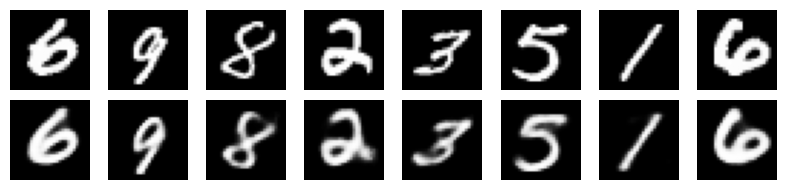

Test loss: 6598.4732
Epoch: 1
Train loss: 6648.001953125 6336/60000
Train loss: 6646.34765625 12736/60000
Train loss: 6696.0986328125 19136/60000
Train loss: 6915.900390625 25536/60000
Train loss: 6236.3798828125 31936/60000
Train loss: 6840.76171875 38336/60000
Train loss: 6734.17041015625 44736/60000
Train loss: 6690.80078125 51136/60000
Train loss: 6791.369140625 57536/60000
Average loss: 6596.161934468284


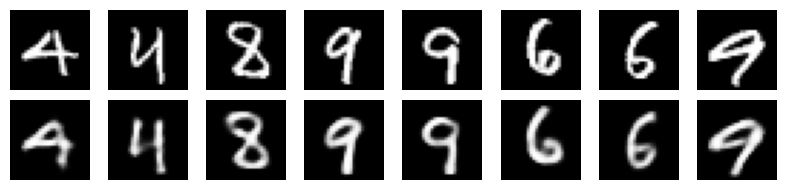

Test loss: 6577.2562
Epoch: 2
Train loss: 6487.21923828125 6336/60000
Train loss: 6199.50439453125 12736/60000
Train loss: 6860.97607421875 19136/60000
Train loss: 6549.28857421875 25536/60000
Train loss: 6492.423828125 31936/60000
Train loss: 6591.4619140625 38336/60000
Train loss: 6640.1484375 44736/60000
Train loss: 6689.11474609375 51136/60000
Train loss: 6542.8583984375 57536/60000
Average loss: 6593.3130538712685


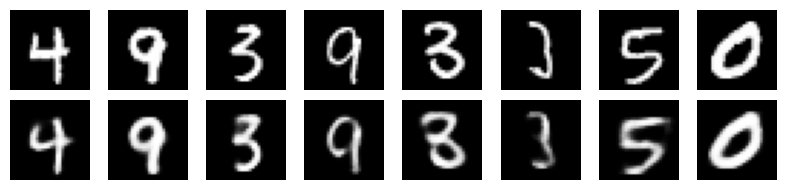

Test loss: 6553.6781
Epoch: 3
Train loss: 6638.09521484375 6336/60000
Train loss: 6590.23779296875 12736/60000
Train loss: 6391.126953125 19136/60000
Train loss: 6505.251953125 25536/60000
Train loss: 6477.40283203125 31936/60000
Train loss: 6759.2158203125 38336/60000
Train loss: 6471.70166015625 44736/60000
Train loss: 6682.2041015625 51136/60000
Train loss: 6546.31982421875 57536/60000
Average loss: 6586.067589473114


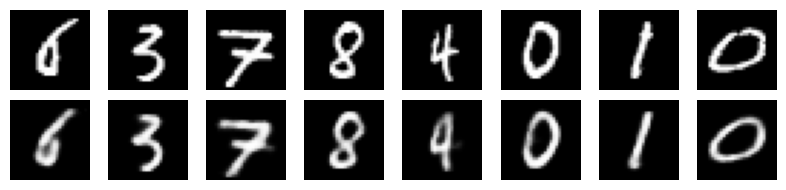

Test loss: 6557.4035
Epoch: 4
Train loss: 7015.16943359375 6336/60000
Train loss: 6578.57470703125 12736/60000
Train loss: 6737.76171875 19136/60000
Train loss: 6550.185546875 25536/60000
Train loss: 6552.517578125 31936/60000
Train loss: 6628.8505859375 38336/60000
Train loss: 6613.1787109375 44736/60000
Train loss: 6766.919921875 51136/60000
Train loss: 6710.7421875 57536/60000
Average loss: 6579.745289491438


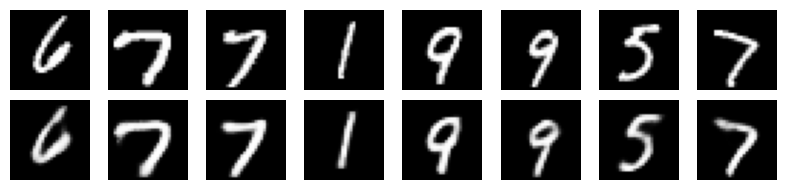

Test loss: 6553.0485
Epoch: 5
Train loss: 6503.01953125 6336/60000
Train loss: 6405.1943359375 12736/60000
Train loss: 6468.3310546875 19136/60000
Train loss: 6789.5654296875 25536/60000
Train loss: 6135.0517578125 31936/60000
Train loss: 6665.779296875 38336/60000
Train loss: 6635.662109375 44736/60000
Train loss: 6439.72607421875 51136/60000
Train loss: 6830.9306640625 57536/60000
Average loss: 6575.5801270572365


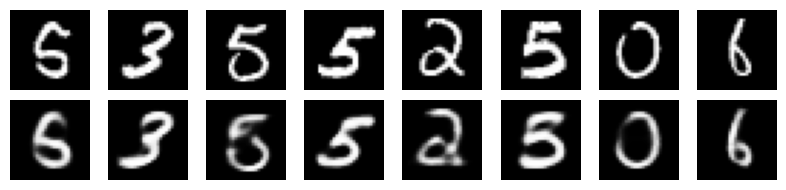

Test loss: 6550.7803
Epoch: 6
Train loss: 6721.5322265625 6336/60000
Train loss: 6306.5224609375 12736/60000
Train loss: 6245.4697265625 19136/60000
Train loss: 6376.39599609375 25536/60000
Train loss: 6687.4345703125 31936/60000
Train loss: 6509.4912109375 38336/60000
Train loss: 6882.45556640625 44736/60000
Train loss: 6511.54345703125 51136/60000
Train loss: 6369.10302734375 57536/60000
Average loss: 6568.620153626399


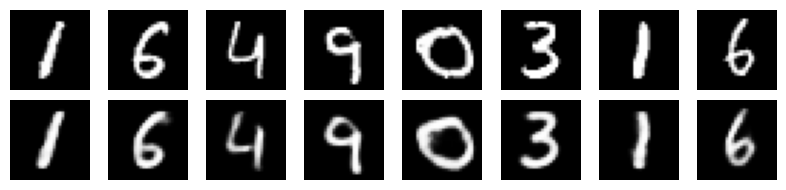

Test loss: 6551.7531
Epoch: 7
Train loss: 6356.50390625 6336/60000
Train loss: 6470.5244140625 12736/60000
Train loss: 6212.681640625 19136/60000
Train loss: 6491.69140625 25536/60000
Train loss: 6404.88525390625 31936/60000
Train loss: 6790.6259765625 38336/60000
Train loss: 6493.6513671875 44736/60000
Train loss: 6519.60546875 51136/60000
Train loss: 6360.31201171875 57536/60000
Average loss: 6563.785210908349


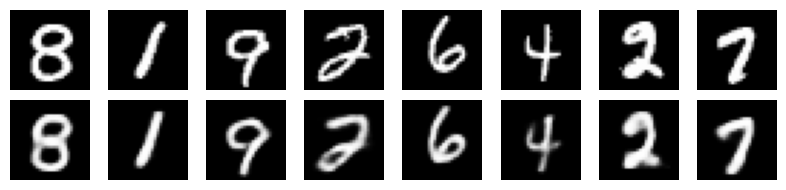

Test loss: 6548.4328
Epoch: 8
Train loss: 6256.7041015625 6336/60000
Train loss: 6770.59375 12736/60000
Train loss: 6673.80126953125 19136/60000
Train loss: 6372.12255859375 25536/60000
Train loss: 7001.8544921875 31936/60000
Train loss: 6544.6748046875 38336/60000
Train loss: 6723.40087890625 44736/60000
Train loss: 6745.59130859375 51136/60000
Train loss: 7058.22216796875 57536/60000
Average loss: 6558.481102786847


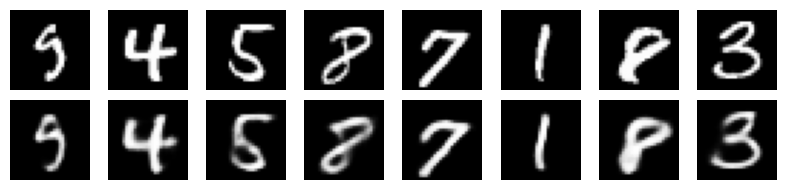

Test loss: 6542.8268
Epoch: 9
Train loss: 6665.4013671875 6336/60000
Train loss: 6660.8359375 12736/60000
Train loss: 6554.6083984375 19136/60000
Train loss: 6775.02734375 25536/60000
Train loss: 6603.6357421875 31936/60000
Train loss: 6624.3818359375 38336/60000
Train loss: 6405.93701171875 44736/60000
Train loss: 6627.58349609375 51136/60000
Train loss: 6626.02734375 57536/60000
Average loss: 6556.897377128032


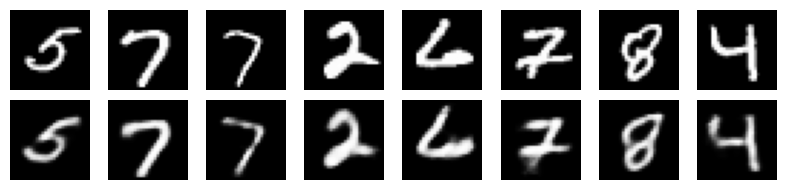

Test loss: 6537.5841
Done


In [30]:
epochs = 10
for t in range(epochs):
  print(f"Epoch: {t}\n =====================")
  train(train_loader, model, loss_function, optimizer)
  test(test_loader, model, loss_function,t)

print("Done")

你问的这段代码是 VAE 训练流程中**用于“重建图像可视化”的部分**，它的作用是：**在每个 epoch 的测试阶段，把原图像和重建图像拼在一起保存成一张图**，方便观察模型的重建能力。

---

## 🔍 逐行解释这段代码：

```python
if i == 0:
```

* 只处理测试集的第一个 batch（避免每次都保存太多图）

---

```python
n = min(data.size(0), 8)
```

* `data.size(0)` 是当前 batch 的大小（通常是 batch\_size）
* 只取前 `n` 张图像，最多取 8 张，避免图像太大不好看

---

```python
comparison = torch.cat([
    data[:n],
    recon_batch.view(args.batch_size, 1, 28, 28)[:n]
])
```

### ✅ 这一行做了什么？

* `data[:n]`：原始输入图像（前 `n` 张）
* `recon_batch.view(...)[:n]`：对应的重建图像（reshape 成图像格式）
* `torch.cat([...])`：把原图和重建图**上下拼接成一组**，变成 2n 张图

---

```python
save_image(comparison.cpu(), 'results/reconstruction_{}.png'.format(epoch), nrow=n)
```

* 把拼接好的图像保存为 `.png` 文件
* 文件名包含当前 `epoch`，比如 `reconstruction_10.png`
* `nrow=n` 表示每行放 `n` 张图，因此你会看到两行：

  * 第一行是原图
  * 第二行是重建图

---

## 📷 图像保存结果的样子（示意）：

```
+----------+----------+----------+----------+
|   原图1  |  原图2   |  原图3   |  ...     |
+----------+----------+----------+----------+
|重建图1  |  重建图2 | 重建图3 |  ...     |
+----------+----------+----------+----------+
```

---

## ✅ 总结：这段代码的作用

| 目的                 | 说明                  |
| ------------------ | ------------------- |
| 保存原图与重建图的对比        | 直观评估模型生成能力、看是否“像原图” |
| 每个 epoch 保存一次      | 用于观察训练过程是否稳定、是否持续提升 |
| 只保存第一个 batch 的前几张图 | 减少输出量，方便查看和对比       |

---

## 🧠 小建议

* 如果你想更直观评估效果，也可以保存 `.gif` 动图或者对比多个 epoch 的图片；
* `save_image()` 是 `torchvision.utils` 提供的图像保存工具，内部会把 `[0,1]` 的张量转成图像格式；

---

是否需要我帮你写一个额外的脚本来自动拼接多个 epoch 的 `reconstruction_*.png` 成一张横向进度图？这样你可以一眼看出模型在第 1、10、20、50 epoch 的进步。
